                             TASK-3 IRIS FLOWER CLASSIFICATION

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

LOADING DATASET

In [2]:
iris_df = pd.read_csv("IRIS.csv")

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.shape

(150, 5)

In [7]:
print(iris_df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


PREPOCESSING THE DATASET

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
# checking for the null values
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


VISUALIZING THE DATASET

Firstly we are going to create a countplot for the species column

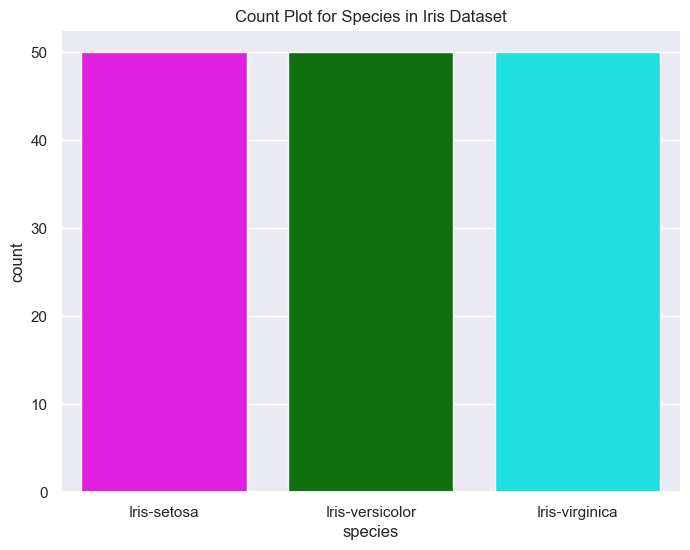

In [11]:
# Creating a count plot for the 'species' column
import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
custom_palette = {'Iris-setosa': 'magenta', 'Iris-versicolor': 'green', 'Iris-virginica': 'cyan'}
sns.countplot(x='species', data=iris_df,palette=custom_palette)
plt.title('Count Plot for Species in Iris Dataset')
plt.show()

Plotting histograms for all columns one by one for data visualization



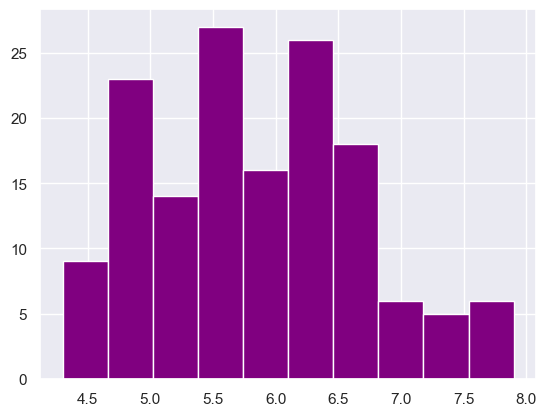

In [12]:
plt.hist(iris_df['sepal_length'],color='purple',edgecolor='white');  

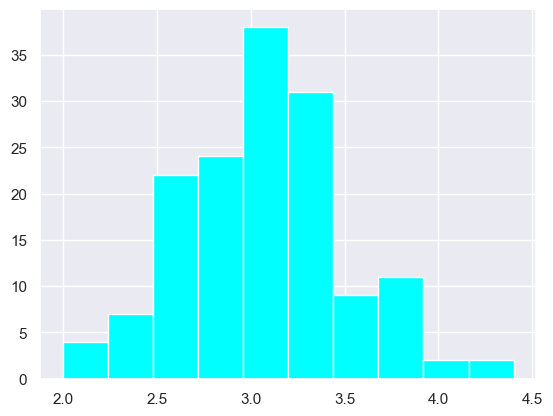

In [13]:
plt.hist(iris_df['sepal_width'],color='cyan',edgecolor='white');

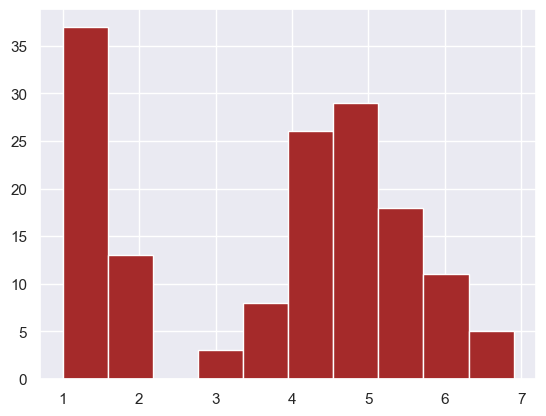

In [14]:
plt.hist(iris_df['petal_length'],color='brown',edgecolor='white');  

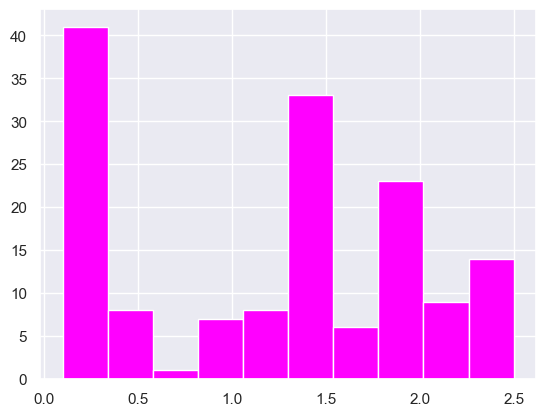

In [15]:
plt.hist(iris_df['petal_width'],color='magenta',edgecolor='white');  

Now we are going to create scatterplots for our columns present in the dataset

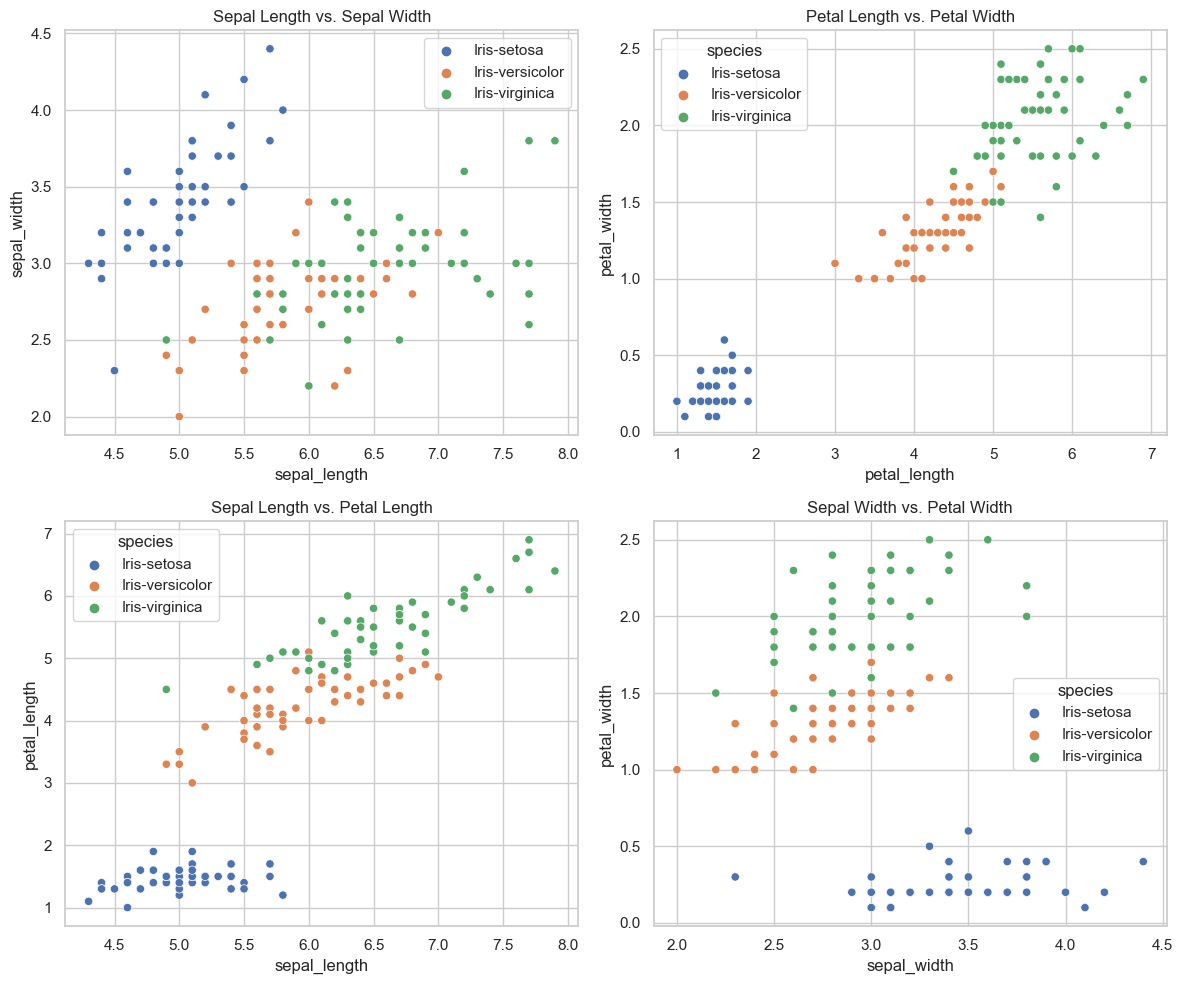

In [16]:
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatterplot for Sepal Length vs. Sepal Width
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_df, hue='species', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs. Sepal Width')

# Scatterplot for Petal Length vs. Petal Width
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df, hue='species', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length vs. Petal Width')

# Scatterplot for Sepal Length vs. Petal Length
sns.scatterplot(x='sepal_length', y='petal_length', data=iris_df, hue='species', ax=axes[1, 0])
axes[1, 0].set_title('Sepal Length vs. Petal Length')

# Scatterplot for Sepal Width vs. Petal Width
sns.scatterplot(x='sepal_width', y='petal_width', data=iris_df, hue='species', ax=axes[1, 1])
axes[1, 1].set_title('Sepal Width vs. Petal Width')

# Adjust layout
plt.tight_layout()

# Show legend
axes[0, 0].legend()

# Show the plot
plt.show()

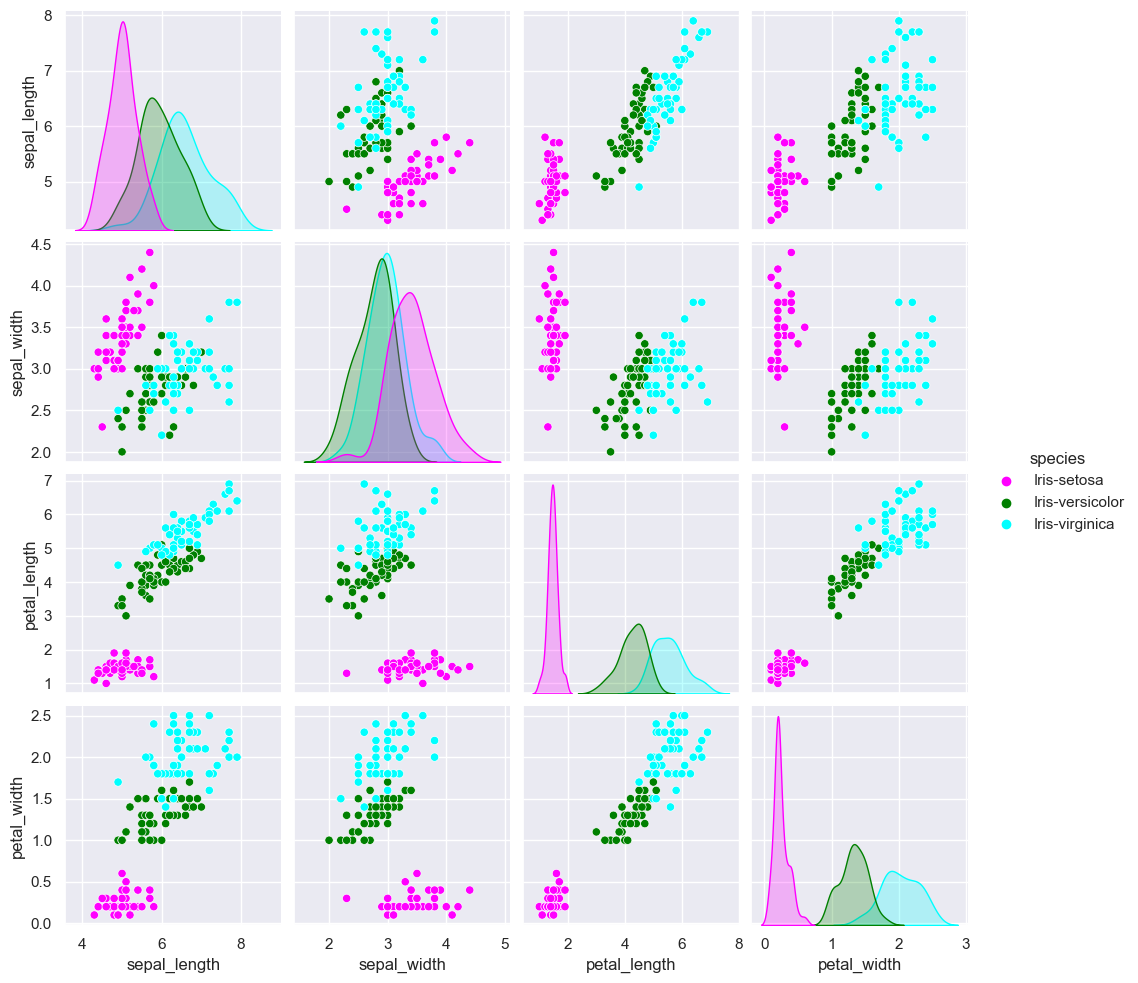

In [17]:
# Creating pairplot
iris_df['species'] = pd.Categorical(iris_df['species'])

sns.set()
custom_palette = {'Iris-setosa': 'magenta', 'Iris-versicolor': 'green', 'Iris-virginica': 'cyan'}
sns.pairplot(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue='species',palette=custom_palette)
plt.show()

Now let us check the coorelation matrix and then visualize it

In [18]:
# COORELATION MATRIX
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_columns = iris_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = iris_df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


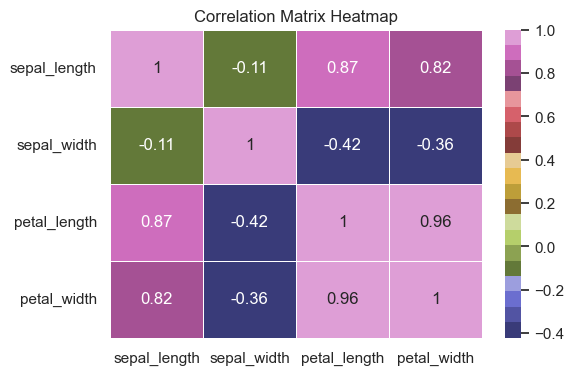

In [19]:
# Creating a heatmap for coorelation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='tab20b', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [21]:
iris_df['species'] = labelencoder.fit_transform(iris_df['species'])

In [22]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


NOW MOVING ONTO THE MODEL TRAINING PART

TRAINING AND CREATING THE MODEL

In [23]:
X=iris_df.drop(columns='species')
Y=iris_df['species']
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [24]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
# Fit the model on the training data
log.fit(X_train, Y_train)

LogisticRegression()

In [26]:
print("Accuracy: ",log.score(X_test,Y_test)*100)

Accuracy:  97.77777777777777


In [27]:
# knn - k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [29]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  95.55555555555556


In [30]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  97.77777777777777
